<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Machine-learning/blob/main/Customer_Abandoning_Prediction(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <b> Customer Abandoning Prediction </b>
### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

**Import Dependancy**

In [9]:
# Import Dependancy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/lecture/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

In [7]:
data.shape

(7043, 21)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### So be find that in this data we have only 3 integer columns.
#### column name "Churn" is the label column and this is in the form of string data.


---




### let's do some EDA on this data

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


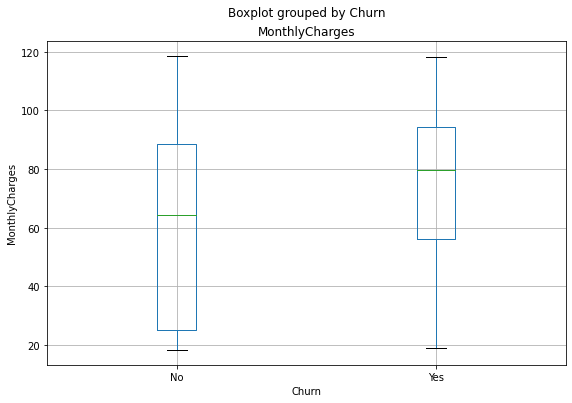

In [10]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
data.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


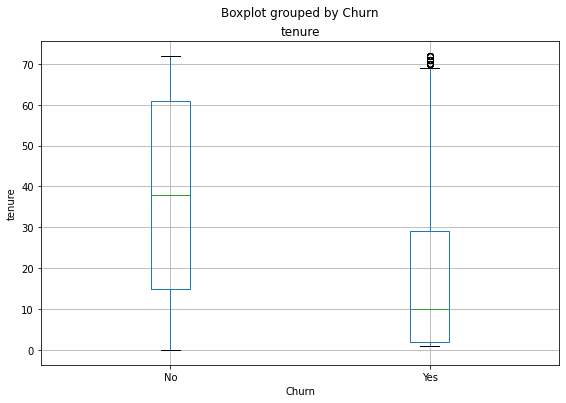

In [11]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
data.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("tenure")
plt.show()

#### <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

### <b> Encoding on churn column  </b>

In [12]:
data['class'] = data['Churn'].apply(lambda x : 1 if x == "Yes" else 0)

**let's create x and y**

In [17]:
# lets create x and y 
x = data[['tenure','MonthlyCharges']]
y = data[['class']]

In [18]:
print(x)

      tenure  MonthlyCharges
0          1           29.85
1         34           56.95
2          2           53.85
3         45           42.30
4          2           70.70
...      ...             ...
7038      24           84.80
7039      72          103.20
7040      11           29.60
7041       4           74.40
7042      66          105.65

[7043 rows x 2 columns]


In [15]:
print(y)

      class
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]




---




### **Split train and test data**

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
print(x.shape, x_train.shape, x_train.shape)

(7043, 2) (5634, 2) (5634, 2)


In [23]:
y_train.value_counts()

class
0        4133
1        1501
dtype: int64

In [24]:
y_test.value_counts()

class
0        1041
1         368
dtype: int64

**So we can say data is not distributed equally**


---



## <b>Fitting logistic regression on train data

In [26]:
# Call LogisticRegression function
logistic = LogisticRegression(fit_intercept=True, max_iter=10000)

In [27]:
# fit LogisticRegression
logistic.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [29]:
# Get the model coefficients
logistic.coef_

array([[-0.05646728,  0.03315385]])

In [30]:
# Get the model intercept
logistic.intercept_

array([-1.77408975])

## <b>Evaluating the performance of the trained model

#### **Get the predicted probabilities**

In [39]:
# Get the predicted probabilities
train_pred = logistic.predict_proba(x_train)
test_pred = logistic.predict_proba(x_test)

In [40]:
print(train_pred)

[[0.95339588 0.04660412]
 [0.73651841 0.26348159]
 [0.99306604 0.00693396]
 ...
 [0.9873984  0.0126016 ]
 [0.38179791 0.61820209]
 [0.7897834  0.2102166 ]]


In [41]:
print(test_pred)

[[0.7145149  0.2854851 ]
 [0.78522641 0.21477359]
 [0.53064776 0.46935224]
 ...
 [0.77288679 0.22711321]
 [0.71618111 0.28381889]
 [0.57740038 0.42259962]]


In [42]:
train_pred = logistic.predict_proba(x_train)[:,1]
test_pred = logistic.predict_proba(x_test)[:,1]

In [43]:
print(train_pred)

[0.04660412 0.26348159 0.00693396 ... 0.0126016  0.61820209 0.2102166 ]


In [44]:
print(test_pred)

[0.2854851  0.21477359 0.46935224 ... 0.22711321 0.28381889 0.42259962]


### **Get the predicted classes**

In [45]:
# Get the predicted classes
train_pred_class = logistic.predict(x_train)
test_pred_class = logistic.predict(x_test)

In [47]:
print(train_pred_class)

[0 0 0 ... 0 1 0]


In [48]:
print(test_pred_class)

[0 0 0 ... 0 0 0]


### **Now need to check accuracy**

In [50]:
# Train data accuracy
train_data_accuracy = accuracy_score(train_pred_class,y_train)
test_data_accuracy = accuracy_score(test_pred_class,y_test)

In [ ]:
print(train_data_accuracy)

In [ ]:
print(test_data_accuracy)